In [19]:
# 1. Imports & Setup
import duckdb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re

# Optional: pretty display
pd.set_option('display.max_columns', None)
sns.set(style="whitegrid")

# 2. Load Data (Choose your file type)
# For Parquet:
df = duckdb.query("SELECT * FROM '../data/tradeindia_final.parquet'").to_df()

# For CSV, use:
# df = duckdb.query("SELECT * FROM 'scraped_data_transformed.csv'").to_df()

print(f"Data shape: {df.shape}")
display(df.head())


Data shape: (12, 85)


,product_name,product_link,category,features,shape,capacity,wall_thickness,color,temperature_resistance,material,usage,product_type,application,mounting_type,fob_port,supply_ability,delivery_time,sample_available,sample_policy,main_domestic_market,pkg_box_length,currency,moq,price_type,price,returnable,weight,unit_type,packsize,mrp,brand_name,product_unit,stock_quantity,pkg_box_breadth,pkg_box_height,shipping_type,mop,minimum_order_quantity,minimum_ordered_packs,gstin,seller_city,seller_state,seller_address,volume_(l),surface_materials,payment_terms,processing,size,condition,general_use,type,weight_(kg),computerized,automatic,touch_screen,control_system,surface_treatment,qc_system,drawing,dimension(l*w*h),feature,warranty,packaging_details,main_export_market(s),certifications,thickness,grade,plastic_type,work_type,pattern,occasion,design,fabric_type,gender/age_group,style,gender,closure,season,pattern_type,logo_pattern,sleeve_style,is_stainless,product_name_clean,capacity_liters,row_num
0,Drinking Water Storage Tank - Application: Res...,https://www.tradeindia.com/products/drinking-w...,Water Storage Tanks,Food-grade safe rust- and algae-resistant hygi...,Cylindrical,10000 Approx Ltr,"1.5 aEUR"" 2.5 mm Millimeter (mm)",Silver,0AdegC to 70AdegC,Steel,Storage of potable/drinking water,Water Storage Tank,Residential buildings commercial complexes hos...,"Other Above Ground aEUR"" On Concrete",Greater Noida,5 Per Year,30-45 Days,No,Contact us for information regarding our sampl...,All India,0.00 Inches,INR,1.0,fixed,10000000.00 INR (Approx.),No,3000.00 Kilograms (KG),Liter/Liters,1.0,2.36 INR,LGS Projects Pvt Ltd,1 Liter/Liters,5.0,0.00 Inches,0.00 Inches,actual,1.0,1.0,1.0,0%,Greater Noida,Uttar Pradesh,F-343 Sector-36 Greater Noida Uttar Pradesh 20...,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,drinking water storage tank application resid...,10000.0,1
1,Plastic Water Storage Tank - Color: Black,https://www.tradeindia.com/products/plastic-wa...,Water Storage Tanks,None,Cylindrical,None,None,Black,None,Plastic,None,None,None,None,None,100 Per Month,7 Days,None,None,All India,None,None,NaN,None,None,None,None,None,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,None,Pune,Maharashtra,Shiv Kamal No.15 Vithal Nagar Solapur Road Had...,500 1000 etc Liter (L),Plastic,Cash in Advance (CID),None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,plastic water storage tank color black,NaN,2
2,Sintex Underground Water Storage Tank - Durabl...,https://www.tradeindia.com/products/sintex-und...,Water Storage Tanks,None,None,None,None,As Per Requirement,None,None,Industrial,None,None,None,None,100 Per Month,10 Days,None,None,All India,None,None,NaN,None,None,None,None,None,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,None,Bengaluru,Karnataka,No.93 Phase No. 3 Surya City Near Oxford Medic...,None,None,Cash in Advance (CID),Normal,Different available,NEW,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,False,sintex underground water storage tank durable...,NaN,3
3,15Kw Stainless Steel Water Storage Tank For Li...,https://www.tradeindia.com/products/15kw-stain...,Water Storage Tanks,None,None,As per the client required Ton/day,None,Stainless Steel finished,None,Stainless Steel Alloy,None,Stainless Steel Water Storage Tank,None,None,India,None,4 - 6 Week,Yes,Contact us for information regarding our sampl...,All India,None,None,NaN,None,None,None,None,None,NaN,None,None,None,NaN,None,None,None,NaN,NaN,NaN,None,Ahmedabad,Gujarat,Plot No. 2802 ROAD NO - 4 E Near Ramol Char Ra...,None,None,None,None,None,None,For water storage,Other,In kgs Kilograms (kg),Yes,Yes,Y

In [4]:
print("\n=== Data Types ===")
print(df.dtypes)
print("\n=== Info ===")
df.info()

print("\n=== Nulls by Column ===")
display(df.isnull().sum())

print("\n=== Numeric Description ===")
display(df.describe())

print("\n=== Categorical Description ===")
display(df.describe(include='object').T)



=== Data Types ===
product_name               object
company_name               object
product_link               object
category                   object
grade                      object
material                   object
plastic_type               object
shape                      object
volume_(l)                 object
payment_terms              object
supply_ability             object
delivery_time              object
main_domestic_market       object
color                      object
buttom_base                object
size                       object
diameter                   object
surface_materials          object
usage                      object
capacity                   object
application                object
product_type               object
condition                  object
height                     object
thickness                  object
main_export_market(s)      object
mop                       float64
returnable                 object
currency                   o

product_name               0
company_name               0
product_link               0
category                   0
grade                     22
material                  14
plastic_type              24
shape                     19
volume_(l)                25
payment_terms             19
supply_ability            11
delivery_time              9
main_domestic_market      12
color                      9
buttom_base               30
size                      17
diameter                  28
surface_materials         26
usage                     23
capacity                  26
application               25
product_type              21
condition                 23
height                    30
thickness                 28
main_export_market(s)     28
mop                       21
returnable                21
currency                  21
product_unit              21
stock_quantity            21
packsize                  22
price                     21
unit_type                 22
moq           


=== Numeric Description ===


,mop,stock_quantity,packsize,moq,minimum_ordered_packs,minimum_order_quantity,capacity_liters,row_num
count,11.000000,11.000000,10.0,11.000000,11.000000,11.000000,4.00000,32.000000
mean,6.454545,31.818182,1.0,6.454545,6.454545,6.454545,15375.00000,16.500000
std,17.761552,51.150402,0.0,17.761552,17.761552,17.761552,23492.46333,9.380832
min,1.000000,5.000000,1.0,1.000000,1.000000,1.000000,500.00000,1.000000
25%,1.000000,7.500000,1.0,1.000000,1.000000,1.000000,875.00000,8.750000
50%,1.000000,15.000000,1.0,1.000000,1.000000,1.000000,5500.00000,16.500000
75%,1.000000,22.500000,1.0,1.000000,1.000000,1.000000,20000.00000,24.250000
max,60.000000,180.000000,1.0,60.000000,60.000000,60.000000,50000.00000,32.000000



=== Categorical Description ===


,count,unique,top,freq
product_name,32,32,Domestic Water Storage Tank - Grade: Multigrade,1
company_name,32,6,Unknown,27
product_link,32,32,https://www.tradeindia.com/products/domestic-w...,1
category,32,1,Water Storage Tanks,32
grade,10,8,Industrial,3
material,18,5,Plastic,9
plastic_type,8,4,LLDPE,4
shape,13,4,Cylindrical,9
volume_(l),7,6,1000 Liter (L),2
payment_terms,13,7,Cash in Advance (CID),6


In [5]:
print(f"Duplicate rows: {df.duplicated().sum()}")

# Example: unknown brands
if 'brand' in df.columns:
    print("Unknown brands:", (df['brand'].astype(str).str.lower() == 'unknown').sum())

# Columns with many nulls
print("\nColumns with >50% nulls:")
print(df.isnull().mean()[df.isnull().mean() > 0.5])


Duplicate rows: 0

Columns with >50% nulls:
grade                     0.68750
plastic_type              0.75000
shape                     0.59375
volume_(l)                0.78125
payment_terms             0.59375
buttom_base               0.93750
size                      0.53125
diameter                  0.87500
surface_materials         0.81250
usage                     0.71875
capacity                  0.81250
application               0.78125
product_type              0.65625
condition                 0.71875
height                    0.93750
thickness                 0.87500
main_export_market(s)     0.87500
mop                       0.65625
returnable                0.65625
currency                  0.65625
product_unit              0.65625
stock_quantity            0.65625
packsize                  0.68750
price                     0.65625
unit_type                 0.68750
moq                       0.65625
price_type                0.65625
brand_name                0.68750
mini

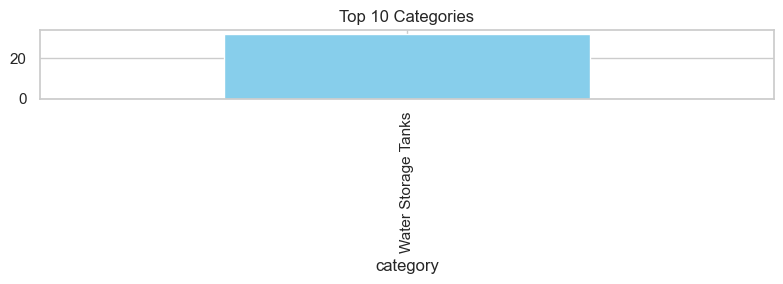

category
Water Storage Tanks    32
Name: count, dtype: int64

Most frequent product names:
product_name_clean
domestic water storage tank  grade multigrade                                                                                                 1
white 10000l aris plastic water tank                                                                                                          1
vertical zincalume water storage tank  50000l capacity zinc finish  industrial use spaceefficient design low maintenance easy installation    1
triple layer white water storage tank height 3771244 inch in                                                                                  1
red 25 ltr insulatedbox                                                                                                                       1
steel storage vessel  stainless steel 304 10 ton capacity silver color  durable leakagefree easy to clean and maintain                        1
stainless steel vertical  

In [6]:
if 'brand' in df.columns:
    plt.figure(figsize=(10,4))
    df['brand'].value_counts().head(10).plot(kind='bar', color='cornflowerblue')
    plt.title("Top 10 Brands")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(df['brand'].value_counts().head(10))

if 'category' in df.columns:
    plt.figure(figsize=(8,3))
    df['category'].value_counts().head(10).plot(kind='bar', color='skyblue')
    plt.title("Top 10 Categories")
    plt.tight_layout()
    plt.show()
    print(df['category'].value_counts().head(10))

if 'product_name_clean' in df.columns:
    print("\nMost frequent product names:")
    print(df['product_name_clean'].value_counts().head(10))


In [7]:
if 'location' in df.columns:
    plt.figure(figsize=(10,4))
    df['location'].value_counts().head(10).plot(kind='bar', color='lightgreen')
    plt.title("Top Supplier Locations")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
    print(df['location'].value_counts().head(10))

# Regional breakdown by brand (heatmap)
if {'location', 'brand'}.issubset(df.columns):
    pivot = pd.crosstab(df['location'], df['brand'])
    top_locations = df['location'].value_counts().head(10).index
    top_brands = df['brand'].value_counts().head(10).index
    plt.figure(figsize=(10,6))
    sns.heatmap(pivot.loc[top_locations, top_brands], annot=True, fmt="d", cmap="Blues")
    plt.title("Brand Distribution by Top Locations")
    plt.show()


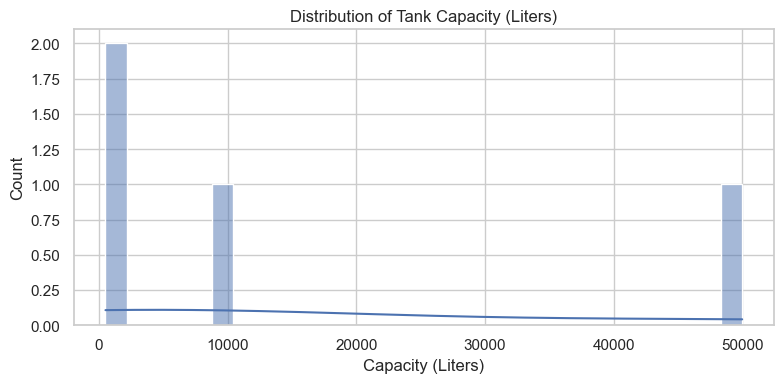

In [8]:
if 'capacity_liters' in df.columns:
    plt.figure(figsize=(8,4))
    sns.histplot(df['capacity_liters'].dropna(), bins=30, kde=True)
    plt.title("Distribution of Tank Capacity (Liters)")
    plt.xlabel("Capacity (Liters)")
    plt.tight_layout()
    plt.show()



Most common keywords in product names:
steel: 9
color: 9
stainless: 8
plastic: 6
capacity: 6
white: 4
industrial: 4
easy: 4
silver: 4
black: 4
finish: 3
design: 3
layer: 3
durable: 3
underground: 3
grade: 2
vertical: 2
installation: 2
triple: 2
inch: 2


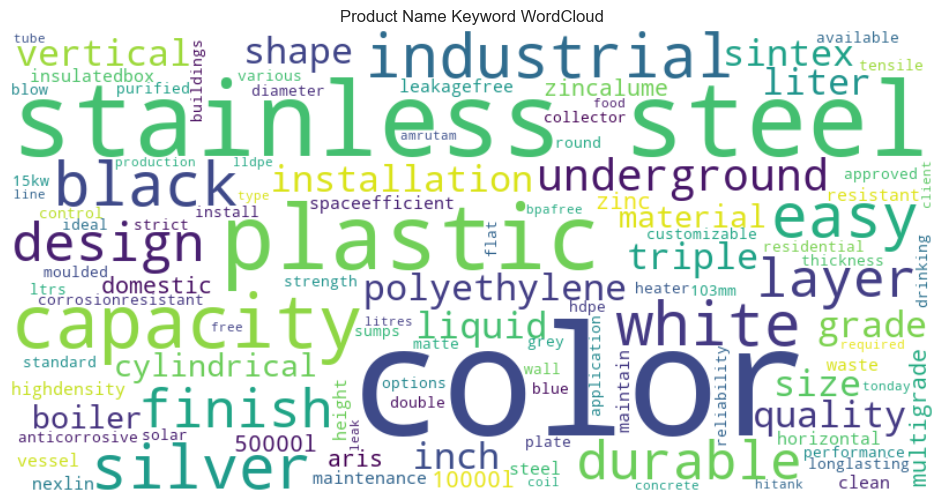

In [9]:
def extract_keywords(name):
    if pd.isnull(name):
        return []
    words = re.findall(r'\w+', name.lower())
    # Ignore very short or very common words
    common = {'the', 'for', 'and', 'with', 'tank', 'tanks', 'water', 'storage'}
    return [w for w in words if len(w) > 3 and w not in common]

if 'product_name_clean' in df.columns:
    all_keywords = df['product_name_clean'].dropna().apply(extract_keywords)
    keywords_flat = [word for words in all_keywords for word in words]
    common_keywords = Counter(keywords_flat).most_common(20)
    print("\nMost common keywords in product names:")
    for kw, count in common_keywords:
        print(f"{kw}: {count}")

    # Optional: Wordcloud
    try:
        from wordcloud import WordCloud
        text = " ".join(keywords_flat)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("Product Name Keyword WordCloud")
        plt.show()
    except ImportError:
        print("Install 'wordcloud' for wordcloud plots: pip install wordcloud")



Most common keywords in product names:
steel: 9
color: 9
stainless: 8
plastic: 6
capacity: 6
white: 4
industrial: 4
easy: 4
silver: 4
black: 4
finish: 3
design: 3
layer: 3
durable: 3
underground: 3
grade: 2
vertical: 2
installation: 2
triple: 2
inch: 2


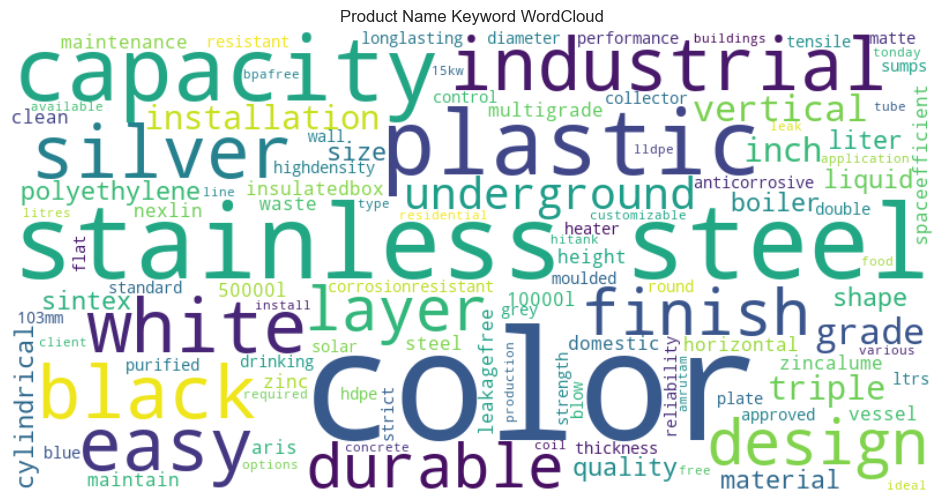

In [10]:
def extract_keywords(name):
    if pd.isnull(name):
        return []
    words = re.findall(r'\w+', name.lower())
    # Ignore very short or very common words
    common = {'the', 'for', 'and', 'with', 'tank', 'tanks', 'water', 'storage'}
    return [w for w in words if len(w) > 3 and w not in common]

if 'product_name_clean' in df.columns:
    all_keywords = df['product_name_clean'].dropna().apply(extract_keywords)
    keywords_flat = [word for words in all_keywords for word in words]
    common_keywords = Counter(keywords_flat).most_common(20)
    print("\nMost common keywords in product names:")
    for kw, count in common_keywords:
        print(f"{kw}: {count}")

    # Optional: Wordcloud
    try:
        from wordcloud import WordCloud
        text = " ".join(keywords_flat)
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(12, 6))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis('off')
        plt.title("Product Name Keyword WordCloud")
        plt.show()
    except ImportError:
        print("Install 'wordcloud' for wordcloud plots: pip install wordcloud")


In [11]:
if 'capacity_liters' in df.columns:
    q1 = df['capacity_liters'].quantile(0.25)
    q3 = df['capacity_liters'].quantile(0.75)
    iqr = q3 - q1
    outliers = df[(df['capacity_liters'] < q1 - 1.5*iqr) | (df['capacity_liters'] > q3 + 1.5*iqr)]
    print(f"Capacity outliers (IQR): {outliers.shape[0]}")
    display(outliers[['product_name', 'capacity', 'capacity_liters']])


Capacity outliers (IQR): 1


,product_name,capacity,capacity_liters
15,Industrial Water Storage Tank - Capacity: 5000...,50000 Ltr,50000.0


Index(['product_name', 'product_link', 'category', 'features', 'shape',
       'capacity', 'wall_thickness', 'color', 'temperature_resistance',
       'material', 'usage', 'product_type', 'application', 'mounting_type',
       'fob_port', 'supply_ability', 'delivery_time', 'sample_available',
       'sample_policy', 'main_domestic_market', 'pkg_box_length', 'currency',
       'moq', 'price_type', 'price', 'returnable', 'weight', 'unit_type',
       'packsize', 'mrp', 'brand_name', 'product_unit', 'stock_quantity',
       'pkg_box_breadth', 'pkg_box_height', 'shipping_type', 'mop',
       'minimum_order_quantity', 'minimum_ordered_packs', 'gstin',
       'seller_city', 'seller_state', 'seller_address', 'volume_(l)',
       'surface_materials', 'payment_terms', 'processing', 'size', 'condition',
       'general_use', 'type', 'weight_(kg)', 'computerized', 'automatic',
       'touch_screen', 'control_system', 'surface_treatment', 'qc_system',
       'drawing', 'dimension(l*w*h)', 'feature

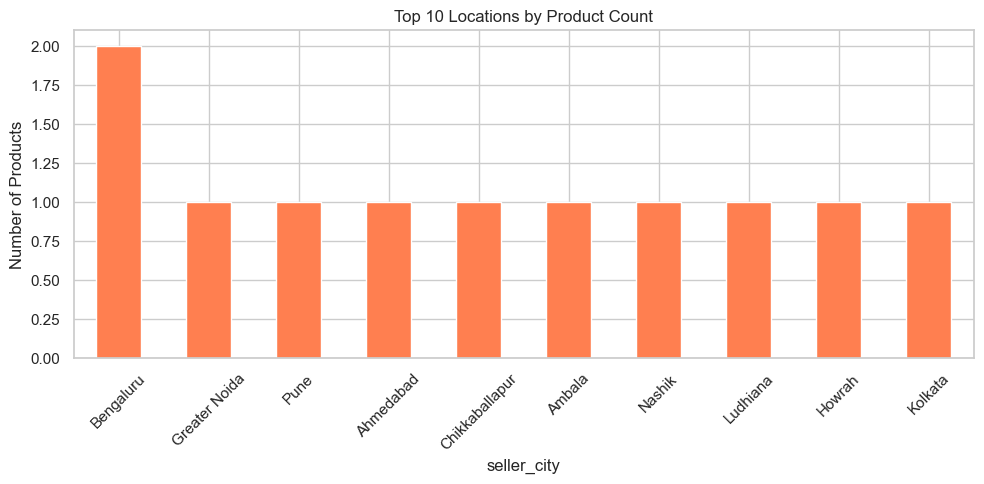

In [21]:
# If needed, adjust column names to match your actual data
location_col = 'seller_city'
category_col = 'category'
print(df.columns)
# ----- 1. Top Locations Overall -----
if location_col in df.columns:
    print("\n=== Top 10 Locations by Number of Products ===")
    print(df[location_col].value_counts().head(10))

    plt.figure(figsize=(10, 5))
    df[location_col].value_counts().head(10).plot(kind='bar', color='coral')
    plt.title("Top 10 Locations by Product Count")
    plt.ylabel("Number of Products")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("top_10_locations.png")
    plt.show()


=== Top 10 Product Categories ===
category
Water Storage Tanks    32
Name: count, dtype: int64


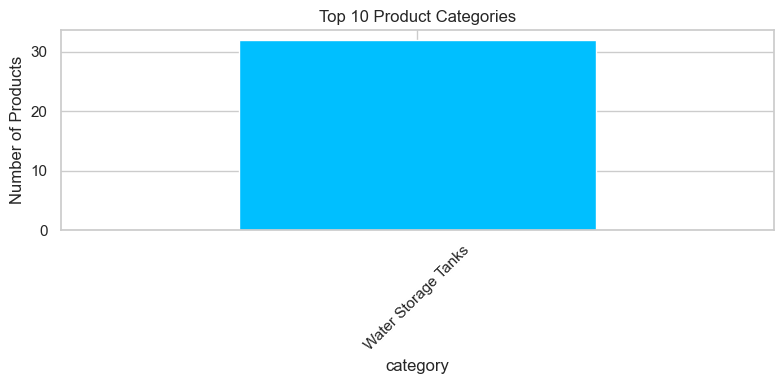

In [13]:
# ----- 2. Top Categories Overall -----
if category_col in df.columns:
    print("\n=== Top 10 Product Categories ===")
    print(df[category_col].value_counts().head(10))

    plt.figure(figsize=(8, 4))
    df[category_col].value_counts().head(10).plot(kind='bar', color='deepskyblue')
    plt.title("Top 10 Product Categories")
    plt.ylabel("Number of Products")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig("top_10_categories.png")
    plt.show()